In [70]:
import pandas as pd
from pandas import datetime
from matplotlib import pyplot as plt

In [71]:
energy_data = pd.read_csv("C:/Users/Amit/Desktop/MS in Data Science/Sem4/Seminar Topics 672/Project/Dataset/energy.csv")
weather_data = pd.read_csv("C:/Users/Amit/Desktop/MS in Data Science/Sem4/Seminar Topics 672/Project/Dataset/weather_daily_darksky.csv")
household_data = pd.read_csv("C:/Users/Amit/Desktop/MS in Data Science/Sem4/Seminar Topics 672/Project/Dataset/informations_households.csv")

In [84]:
weather_data.columns

Index(['temperatureMax', 'temperatureMaxTime', 'windBearing', 'icon',
       'dewPoint', 'temperatureMinTime', 'cloudCover', 'windSpeed', 'pressure',
       'apparentTemperatureMinTime', 'apparentTemperatureHigh', 'precipType',
       'visibility', 'humidity', 'apparentTemperatureHighTime',
       'apparentTemperatureLow', 'apparentTemperatureMax', 'uvIndex', 'time',
       'sunsetTime', 'temperatureLow', 'temperatureMin', 'temperatureHigh',
       'sunriseTime', 'temperatureHighTime', 'uvIndexTime', 'summary',
       'temperatureLowTime', 'apparentTemperatureMin',
       'apparentTemperatureMaxTime', 'apparentTemperatureLowTime', 'moonPhase',
       'day'],
      dtype='object')

In [72]:
housecount = energy_data.groupby('day')[['LCLid']].nunique()
housecount.head(4)

,LCLid
day,
2011-11-23,13
2011-11-24,25
2011-11-25,32
2011-11-26,41


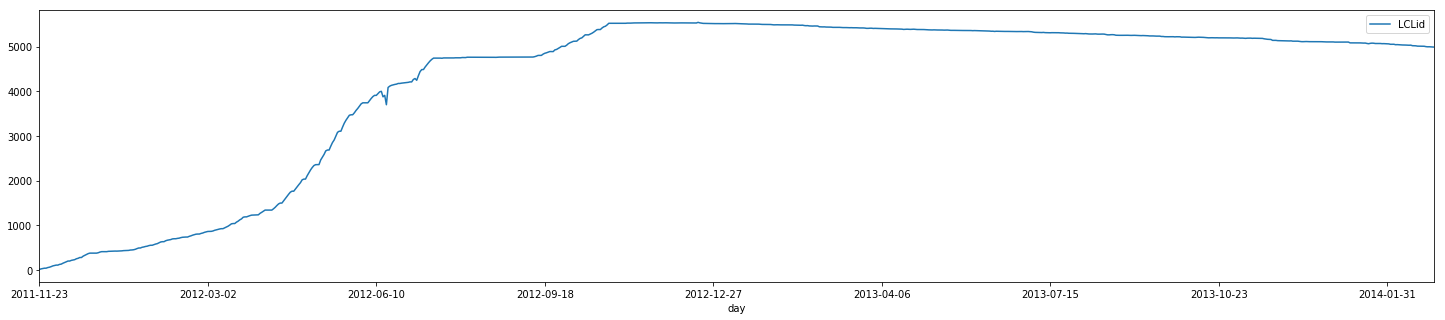

In [122]:
housecount.plot(figsize=(25,5))

In [74]:
energy = energy_data.groupby('day')[['energy_sum']].sum()
energy = energy.merge(housecount,on = ['day'])

In [75]:
energy = energy.reset_index()

In [76]:
energy.count()

day           829
energy_sum    829
LCLid         829
dtype: int64

In [77]:
energy.day = pd.to_datetime(energy.day,format='%Y-%m-%d').dt.date

In [78]:
energy['avg_energy'] =  energy['energy_sum']/energy['LCLid']
print("Starting Point of Data at Day Level",min(energy.day))
print("Ending Point of Data at Day Level",max(energy.day))

Starting Point of Data at Day Level 2011-11-23
Ending Point of Data at Day Level 2014-02-28


In [79]:
energy.describe()

,energy_sum,LCLid,avg_energy
count,829.000000,829.000000,829.000000
mean,43535.325676,4234.539204,10.491862
std,20550.594031,1789.994799,1.902513
min,90.385000,13.000000,0.211766
25%,34665.436003,4084.000000,8.676955
50%,46641.160997,5138.000000,10.516983
75%,59755.616996,5369.000000,12.000690
max,84156.135002,5541.000000,15.964434


In [80]:
energy

,day,energy_sum,LCLid,avg_energy
0,2011-11-23,90.385000,13,6.952692
1,2011-11-24,213.412000,25,8.536480
2,2011-11-25,303.993000,32,9.499781
3,2011-11-26,420.976000,41,10.267707
4,2011-11-27,444.883001,41,10.850805
5,2011-11-28,500.686000,55,9.103382
6,2011-11-29,584.317001,63,9.274873
7,2011-11-30,669.827000,76,8.813513
8,2011-12-01,848.949001,92,9.227707
9,2011-12-02,1014.591001,100,10.145910


In [81]:
weather_data.head(4)

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25


In [85]:
weather_data['day']=  pd.to_datetime(weather_data['time']) # day is given as timestamp
weather_data['day']=  pd.to_datetime(weather_data['day'],format='%Y%m%d').dt.date

In [86]:
weather_data = weather_data.dropna()

In [87]:
weather_energy =  energy.merge(weather_data,on='day')
weather_energy.head(2)

,day,energy_sum,LCLid,avg_energy,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,2011-11-23,90.385,13,6.952692,10.36,2011-11-23 14:00:00,229,fog,6.29,2011-11-23 07:00:00,...,10.36,2011-11-23 07:32:38,2011-11-23 14:00:00,2011-11-23 10:00:00,Foggy in the morning.,2011-11-23 22:00:00,2.18,2011-11-23 14:00:00,2011-11-23 22:00:00,0.94
1,2011-11-24,213.412,25,8.536480,12.93,2011-11-24 12:00:00,204,partly-cloudy-night,8.56,2011-11-24 02:00:00,...,12.93,2011-11-24 07:34:14,2011-11-24 12:00:00,2011-11-24 10:00:00,Partly cloudy throughout the day.,2011-11-24 19:00:00,7.01,2011-11-24 12:00:00,2011-11-24 19:00:00,0.97


In [88]:
weather_energy = weather_energy[['day','avg_energy','temperatureMax','uvIndex','humidity']]

In [89]:
weather_energy

,day,avg_energy,temperatureMax,uvIndex,humidity
0,2011-11-23,6.952692,10.36,1.0,0.93
1,2011-11-24,8.536480,12.93,1.0,0.89
2,2011-11-25,9.499781,13.03,1.0,0.79
3,2011-11-26,10.267707,12.96,1.0,0.81
4,2011-11-27,10.850805,13.54,1.0,0.72
5,2011-11-28,9.103382,12.58,1.0,0.86
6,2011-11-29,9.274873,13.47,1.0,0.82
7,2011-11-30,8.813513,11.87,1.0,0.78
8,2011-12-01,9.227707,12.15,1.0,0.82
9,2011-12-02,10.145910,8.07,1.0,0.87


In [20]:
pd.DatetimeIndex(weather_energy['day']).year  


Int64Index([2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011, 2011,
            ...
            2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014, 2014],
           dtype='int64', name='day', length=828)

In [90]:
weather_energy['Year'] = pd.DatetimeIndex(weather_energy['day']).year  
weather_energy['Month'] = pd.DatetimeIndex(weather_energy['day']).month
weather_energy.set_index(['day'],inplace=True)

In [91]:
weather_energy

,avg_energy,temperatureMax,uvIndex,humidity,Year,Month
day,,,,,,
2011-11-23,6.952692,10.36,1.0,0.93,2011,11
2011-11-24,8.536480,12.93,1.0,0.89,2011,11
2011-11-25,9.499781,13.03,1.0,0.79,2011,11
2011-11-26,10.267707,12.96,1.0,0.81,2011,11
2011-11-27,10.850805,13.54,1.0,0.72,2011,11
2011-11-28,9.103382,12.58,1.0,0.86,2011,11
2011-11-29,9.274873,13.47,1.0,0.82,2011,11
2011-11-30,8.813513,11.87,1.0,0.78,2011,11
2011-12-01,9.227707,12.15,1.0,0.82,2011,12


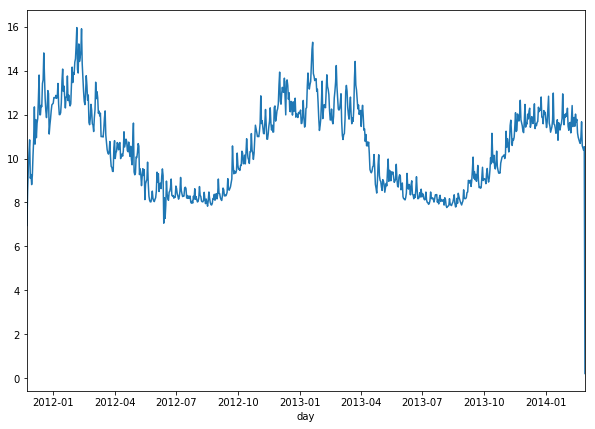

In [92]:
weather_energy['avg_energy'].plot(figsize = (10,7))

In [93]:
weather_energy.head()

,avg_energy,temperatureMax,uvIndex,humidity,Year,Month
day,,,,,,
2011-11-23,6.952692,10.36,1.0,0.93,2011,11
2011-11-24,8.536480,12.93,1.0,0.89,2011,11
2011-11-25,9.499781,13.03,1.0,0.79,2011,11
2011-11-26,10.267707,12.96,1.0,0.81,2011,11
2011-11-27,10.850805,13.54,1.0,0.72,2011,11


In [25]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

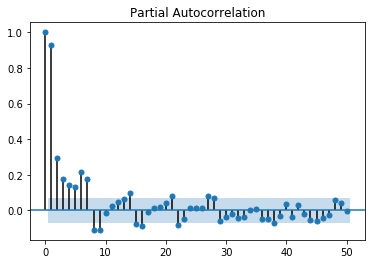

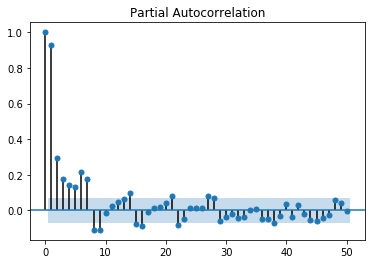

In [26]:
plot_pacf(weather_energy.avg_energy,lags=50)

In [31]:
import statsmodels.api as sm

In [94]:
t = sm.tsa.adfuller(weather_energy.avg_energy, autolag='AIC')
pd.Series(t[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])

Test Statistic                  -1.756929
p-value                          0.402045
#Lags Used                      21.000000
Number of Observations Used    806.000000
dtype: float64

In [42]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [54]:
decomposition = seasonal_decompose(weather_energy.avg_energy,freq=12)

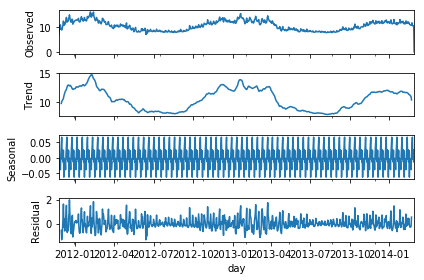

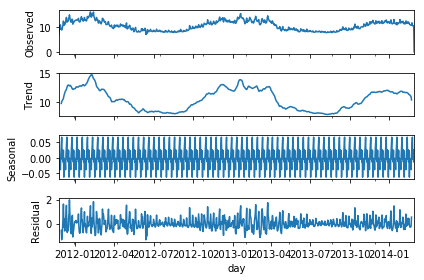

In [55]:
decomposition.plot()

In [1]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [100]:
endog = train['avg_energy']
exog = sm.add_constant(train[['temperatureMax','uvIndex','humidity']])

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [115]:
mod = sm.tsa.statespace.SARIMAX(endog=endog, exog=exog.astype(float), order=(3,1,1),seasonal_order=(1,1, 0,7))
model_fit = mod.fit()
model_fit.summary()

C:\Users\Amit\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Amit\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:218: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Amit\AppData\Roaming\Python\Python37\site-packages\statsmodels\base\model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                         avg_energy   No. Observations:                  798
Model:             SARIMAX(3, 1, 1)x(1, 1, [], 7)   Log Likelihood                -491.537
Date:                            Wed, 22 Apr 2020   AIC                           1003.074
Time:                                    16:48:42   BIC                           1049.794
Sample:                                         0   HQIC                          1021.033
                                            - 798                                         
Covariance Type:                              opg                                         
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const           9.206e-07   4.38e-09    210.228      0.000    9.12e-07    9.29e-07
temperatureMax    -0.0408      0.005     -7.480      0.000      -0.052      -0.030
uvIndex            0.0203      0.030      0.669      0.503      -0.039       0.080
humidity          -0.2153      0.197     -1.090      0.275      -0.602       0.172
ar.L1              0.6271      0.030     20.872      0.000       0.568       0.686
ar.L2              0.1298      0.039      3.287      0.001       0.052       0.207
ar.L3              0.0538      0.033      1.613      0.107      -0.012       0.119
ma.L1             -0.9830      0.009   -105.114      0.000      -1.001      -0.965
ar.S.L7           -0.4876      0.026    -18.906      0.000      -0.538      -0.437
sigma2             0.2023      0.008     24.376      0.000       0.186       0.219
===================================================================================
Ljung-Box (Q):                      106.62   Jarque-Bera (JB):                50.36
Prob(Q):                              0.00   Prob(JB):                         0.00
Heteroskedasticity (H):               0.60   Skew:                            -0.25
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.13
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.97e+23. Standard errors may be unstable.
"""

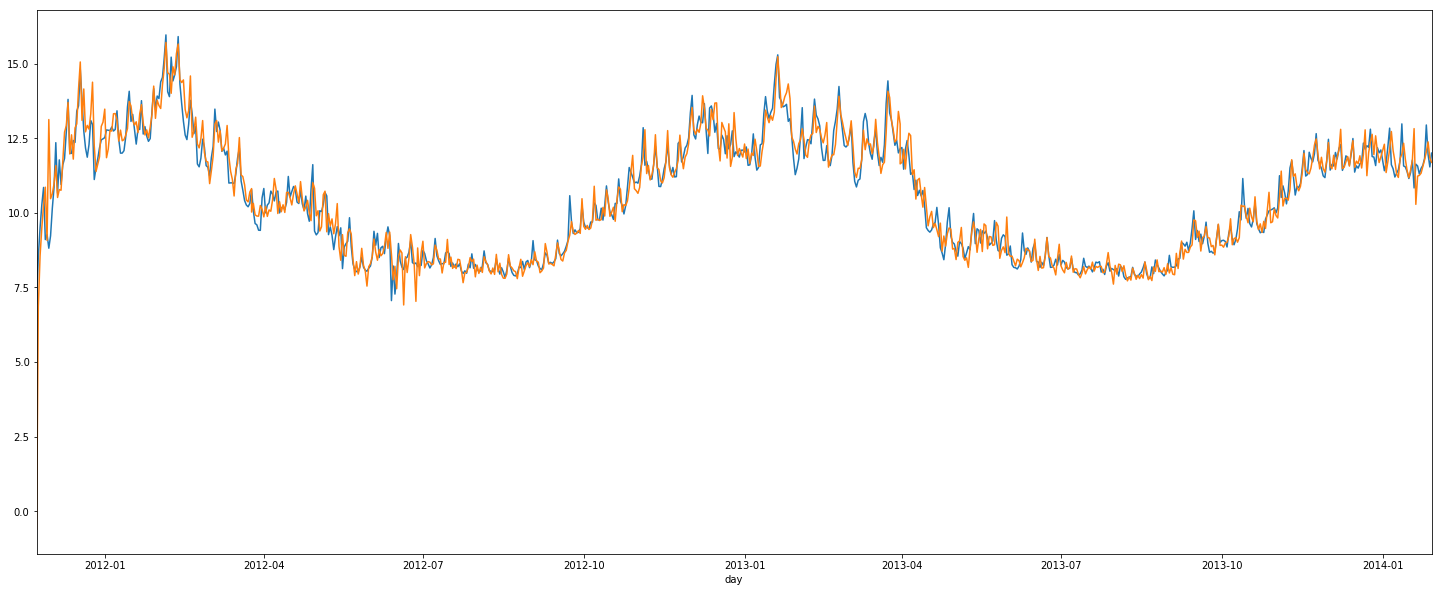

In [117]:
train['avg_energy'].plot(figsize=(25,10))
model_fit.fittedvalues.plot()
plt.show()

In [118]:
predict = model_fit.predict(start = len(train),end = len(train)+len(test)-1,exog = sm.add_constant(test[['temperatureMax','uvIndex','humidity']]))
test['predicted'] = predict.values
test.tail(5)

C:\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2542: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)
C:\Users\Amit\AppData\Roaming\Python\Python37\site-packages\statsmodels\tsa\base\tsa_model.py:583: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,avg_energy,temperatureMax,uvIndex,humidity,Year,Month,predicted
day,,,,,,,
2014-02-23,11.673756,11.94,1.0,0.76,2014,2,12.672316
2014-02-24,10.586235,14.23,1.0,0.74,2014,2,12.095341
2014-02-25,10.476498,11.43,1.0,0.78,2014,2,11.904992
2014-02-26,10.375366,11.29,2.0,0.73,2014,2,12.100080
2014-02-27,10.537250,10.31,2.0,0.74,2014,2,12.029219


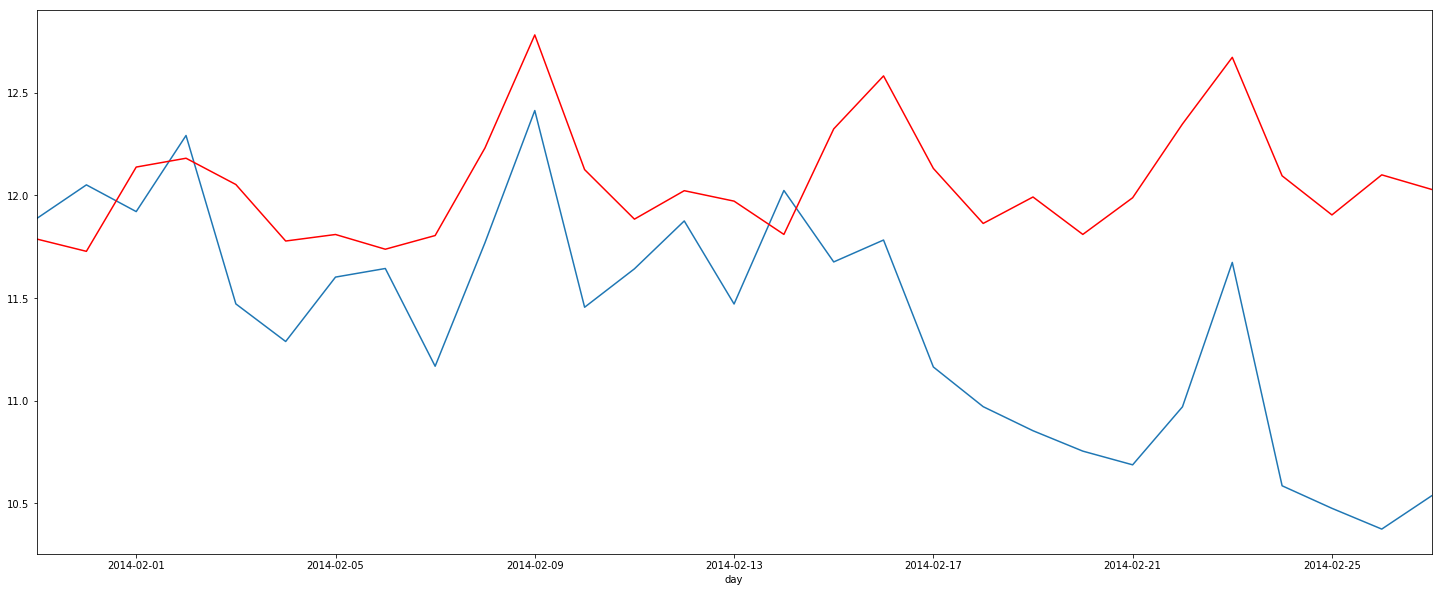

In [119]:
test['avg_energy'].plot(figsize=(25,10))
test['predicted'].plot(color = 'red')
plt.show()

In [ ]:
weather.

In [40]:
import numpy as np

In [99]:
train = model_data.iloc[0:(len(model_data)-30)]
test = model_data.iloc[len(train):(len(model_data)-1)]

In [98]:
model_data = weather_energy

In [67]:
model_data.temperatureMax = model_data['temperatureMax'].astype('float')

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [96]:
weather_energy.dtypes

avg_energy        float64
temperatureMax    float64
uvIndex           float64
humidity          float64
Year                int64
Month               int64
dtype: object

In [120]:
from sklearn.metrics import mean_squared_error

In [121]:
mean_squared_error(test.avg_energy,test.predicted)

0.7476615509757368

In [40]:
pip install pmdarima

  Found existing installation: numpy 1.16.2
    Uninstalling numpy-1.16.2:
      Successfully uninstalled numpy-1.16.2
Note: you may need to restart the kernel to use updated packages.


tables 3.5.1 requires mock>=2.0, which is not installed.
Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\anaconda3\\lib\\site-packages\\~umpy\\core\\_multiarray_tests.cp37-win_amd64.pyd'
Consider using the `--user` option or check the permissions.

